## Assignment - A2.part2
### Devin Hall, Tyler Birnie
### Due: 3-2-22 @ 11:59pm
Some pre-requisites we will need for this project


In [3]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import math as m
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [4]:
# Here we define the data set used for questions 1 and 2 as a 2D matrix, with each row being sample #, Ytrue, Ypred
QUESTION_1_2_DATA = (
    [1, True, 0.98],
    [2, True, 0.92],
    [3, False, 0.87],
    [4, True, 0.76],
    [5, False, 0.74],
    [6, False, 0.61],
    [7, True, 0.57],
    [8, True, 0.38],
    [9, False, 0.34],
    [10, False, 0.32],
)

# Some enums to make array indexing more readable
SAMPLE_COLUMN = 0
YTRUE_COLUMN = 1
YPRED_COLUMN = 2

# A helper class to reduce chance of human error when dealing with confusion matrix data set
class ConfusionMatrixResult:
    def __init__(self, tp, fp, tn, fn):
        self.true_positives = tp
        self.false_positives = fp
        self.true_negatives = tn
        self.false_negatives = fn


# A helper function to take in a 2D array structured like above, and return # of true positives, false positives, true negatives, false negatives at a certain threshold
# contained as a ConfusionMatrixResult
def get_confusion_matrix(data, threshold) -> ConfusionMatrixResult:

    # setup the counts of the confusion matrix
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0

    # Loop through all the data
    for row in data:
        # Extract the data
        sample_num: int = row[SAMPLE_COLUMN]
        actual_state: bool = row[YTRUE_COLUMN]
        predicted_state: float = row[YPRED_COLUMN]

        # Does this data fit in the threshold? i.e. is the predicted state >= threshold we defined
        in_threshold = predicted_state >= threshold

        # First consider the samples that are actually positive, (actual_state == True)
        if actual_state:

            # Is this in the threshold? i.e., did we make a correct prediction?
            if in_threshold:
                true_pos += 1  # This is a true positive
            else:
                false_neg += 1  # Our prediction was wrong, this will be marked as a false negative

        else:
            # Consider samples that are not positive, (actual_state == False)
            # If it isn't in the threshold, that means we guessed correctly that it is negative
            if not in_threshold:
                true_neg += 1  # This is a true negative
            else:
                false_pos += 1  # Our prediction was wrong, we thought this was going to be positive but it wasn't

    # Now that we looped through all the data, let's return the confusion matrix
    return ConfusionMatrixResult(tp=true_pos, fp=false_pos, tn=true_neg, fn=false_neg)

## (Question 1) For the following data set, compute the:

### 1.a: 
True positive rate

In [5]:
# Let's get the confusion matrices of 10 thresholds using the prediction values
# Use list comprehension to generate a list of all the pred columns for every row in the data
THRESHOLDS = [row[YPRED_COLUMN] for row in QUESTION_1_2_DATA]

# Now let's make a 2D array that we are going to print for the answer
_1a_ans = []

# Loop through all the different thresholds we want to use
for thresh in THRESHOLDS:
    # retrieve the confusion matrix using this threshold
    confusion_matrix = get_confusion_matrix(QUESTION_1_2_DATA, thresh)

    # TPR is true positives / (true positives + false negatives)
    tpr = float(confusion_matrix.true_positives) / float(confusion_matrix.true_positives + confusion_matrix.false_negatives)

    # Add this entry to the data we want to display in the format: [threshold, TPR]
    _1a_ans.append([thresh, tpr])

# Now display the data
cols = ['Threshold', 'TPR']
rows = [str(i+1) for i in range(10)]
pd.DataFrame(np.asarray(_1a_ans), index=rows, columns=cols)

,Threshold,TPR
1,0.98,0.2
2,0.92,0.4
3,0.87,0.4
4,0.76,0.6
5,0.74,0.6
6,0.61,0.6
7,0.57,0.8
8,0.38,1.0
9,0.34,1.0
10,0.32,1.0


### 1.b: 
False postive rate

In [6]:
# Note, this is essentially copied from 1a with one modified line
# Let's get the confusion matrices of 10 thresholds using the prediction values
# Use list comprehension to generate a list of all the pred columns for every row in the data
THRESHOLDS = [row[YPRED_COLUMN] for row in QUESTION_1_2_DATA]

# Now let's make a 2D array that we are going to print for the answer
_1b_ans = []

# Loop through all the different thresholds we want to use
for thresh in THRESHOLDS:
    # retrieve the confusion matrix using this threshold
    confusion_matrix = get_confusion_matrix(QUESTION_1_2_DATA, thresh)

    # FPR is false positives / (false positives + true negatives)
    fpr = float(confusion_matrix.false_positives) / float(confusion_matrix.false_positives + confusion_matrix.true_negatives)

    # Add this entry to the data we want to display in the format: [threshold, TPR]
    _1b_ans.append([thresh, fpr])

# Now display the data
cols = ['Threshold', 'FPR']
rows = [str(i+1) for i in range(10)]
pd.DataFrame(np.asarray(_1b_ans), index=rows, columns=cols)

,Threshold,FPR
1,0.98,0.0
2,0.92,0.0
3,0.87,0.2
4,0.76,0.2
5,0.74,0.4
6,0.61,0.6
7,0.57,0.6
8,0.38,0.6
9,0.34,0.8
10,0.32,1.0


### 1.c: 
Accuracy

In [7]:
# Note, this is essentially copied from 1a with one modified line
# Let's get the confusion matrices of 10 thresholds using the prediction values
# Use list comprehension to generate a list of all the pred columns for every row in the data
THRESHOLDS = [row[YPRED_COLUMN] for row in QUESTION_1_2_DATA]

# Now let's make a 2D array that we are going to print for the answer
_1c_ans = []

# Loop through all the different thresholds we want to use
for thresh in THRESHOLDS:
    # retrieve the confusion matrix using this threshold
    confusion_matrix = get_confusion_matrix(QUESTION_1_2_DATA, thresh)

    # ACC is (True positives) / (True positives + False positives)
    acc = float(confusion_matrix.true_positives) / float(confusion_matrix.true_positives + confusion_matrix.false_positives)

    # Add this entry to the data we want to display in the format: [threshold, TPR]
    _1c_ans.append([thresh, acc])

# Now display the data
cols = ['Threshold', 'Accuracy']
rows = [str(i+1) for i in range(10)]
pd.DataFrame(np.asarray(_1c_ans), index=rows, columns=cols)

,Threshold,Accuracy
1,0.98,1.000000
2,0.92,1.000000
3,0.87,0.666667
4,0.76,0.750000
5,0.74,0.600000
6,0.61,0.500000
7,0.57,0.571429
8,0.38,0.625000
9,0.34,0.555556
10,0.32,0.500000


Threshold the classifier output, Ypred, at each possible value (use a greater than equal to
comparison).
Report the results as a matrix/table with rows corresponding with the 10 thresholds and
columns reporting the different thresholds, the true positive rate (TPR), false positive rate
(FPR), and accuracy (ACC).

## (Question 2)
se the results from Question 1 to plot the ROC curve for the data. Note, plot this
curve using the standard plotting tools rather than any special library/package available in R,
Python, or Matlab for making ROC plots.

<AxesSubplot:xlabel='tpr'>

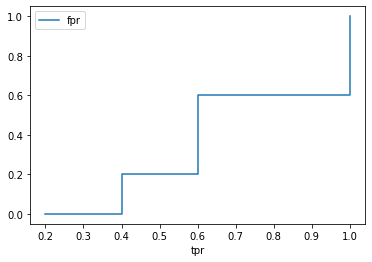

In [8]:
# To plot the ROC curve, we plot a TPR vs FPR graph
# Luckily, we can actually use our answers from before to snag all of our x,y pairs that we are going to plot
# Define a list of points to plot
_q2_x_points = []
_q2_y_points = []

# Loop through the data from before and construct our x and y points
for row in _1a_ans:
    tpr = row[1]
    _q2_x_points.append(tpr)

for row in _1b_ans:
    fpr = row[1]
    _q2_y_points.append(fpr)

# Now construct the dataframe
df = pd.DataFrame({
    'tpr': _q2_x_points,
    'fpr': _q2_y_points
})

df.style.set_caption("ROC Curve")

# Display the xy relationship
df.plot.line(x='tpr', y='fpr')

## (Question 3) Classificaiton of Spam

### 3.a: 
Load in the spambase data

In [9]:
# Some constants to define for ease of access of the data,
# Automatically generated using a python script
WORD_FREQ_MAKE = 'word_freq_make'
WORD_FREQ_ADDRESS = 'word_freq_address'
WORD_FREQ_ALL = 'word_freq_all'
WORD_FREQ_3D = 'word_freq_3d'
WORD_FREQ_OUR = 'word_freq_our'
WORD_FREQ_OVER = 'word_freq_over'
WORD_FREQ_REMOVE = 'word_freq_remove'
WORD_FREQ_INTERNET = 'word_freq_internet'
WORD_FREQ_ORDER = 'word_freq_order'
WORD_FREQ_MAIL = 'word_freq_mail'
WORD_FREQ_RECEIVE = 'word_freq_receive'
WORD_FREQ_WILL = 'word_freq_will'
WORD_FREQ_PEOPLE = 'word_freq_people'
WORD_FREQ_REPORT = 'word_freq_report'
WORD_FREQ_ADDRESSES = 'word_freq_addresses'
WORD_FREQ_FREE = 'word_freq_free'
WORD_FREQ_BUSINESS = 'word_freq_business'
WORD_FREQ_EMAIL = 'word_freq_email'
WORD_FREQ_YOU = 'word_freq_you'
WORD_FREQ_CREDIT = 'word_freq_credit'
WORD_FREQ_YOUR = 'word_freq_your'
WORD_FREQ_FONT = 'word_freq_font'
WORD_FREQ_000 = 'word_freq_000'
WORD_FREQ_MONEY = 'word_freq_money'
WORD_FREQ_HP = 'word_freq_hp'
WORD_FREQ_HPL = 'word_freq_hpl'
WORD_FREQ_GEORGE = 'word_freq_george'
WORD_FREQ_650 = 'word_freq_650'
WORD_FREQ_LAB = 'word_freq_lab'
WORD_FREQ_LABS = 'word_freq_labs'
WORD_FREQ_TELNET = 'word_freq_telnet'
WORD_FREQ_857 = 'word_freq_857'
WORD_FREQ_DATA = 'word_freq_data'
WORD_FREQ_415 = 'word_freq_415'
WORD_FREQ_85 = 'word_freq_85'
WORD_FREQ_TECHNOLOGY = 'word_freq_technology'
WORD_FREQ_1999 = 'word_freq_1999'
WORD_FREQ_PARTS = 'word_freq_parts'
WORD_FREQ_PM = 'word_freq_pm'
WORD_FREQ_DIRECT = 'word_freq_direct'
WORD_FREQ_CS = 'word_freq_cs'
WORD_FREQ_MEETING = 'word_freq_meeting'
WORD_FREQ_ORIGINAL = 'word_freq_original'
WORD_FREQ_PROJECT = 'word_freq_project'
WORD_FREQ_RE = 'word_freq_re'
WORD_FREQ_EDU = 'word_freq_edu'
WORD_FREQ_TABLE = 'word_freq_table'
WORD_FREQ_CONFERENCE = 'word_freq_conference'
CHAR_FREQ_SEMICOLON = 'char_freq_;'
CHAR_FREQ_L_PARENTH = 'char_freq_('
CHAR_FREQ_L_BRACKET = 'char_freq_['
CHAR_FREQ_EXCLAIM_POINT = 'char_freq_!'
CHAR_FREQ_DOLLAR_SIGN = 'char_freq_$'
CHAR_FREQ_HASHTAG = 'char_freq_#'
CAPITAL_RUN_LENGTH_AVERAGE = 'capital_run_length_average'
CAPITAL_RUN_LENGTH_LONGEST = 'capital_run_length_longest'
CAPITAL_RUN_LENGTH_TOTAL = 'capital_run_length_total'
IS_SPAM = 'is_spam'

SPAMBASE_COLUMNS = [
	WORD_FREQ_MAKE,
	WORD_FREQ_ADDRESS,
	WORD_FREQ_ALL,
	WORD_FREQ_3D,
	WORD_FREQ_OUR,
	WORD_FREQ_OVER,
	WORD_FREQ_REMOVE,
	WORD_FREQ_INTERNET,
	WORD_FREQ_ORDER,
	WORD_FREQ_MAIL,
	WORD_FREQ_RECEIVE,
	WORD_FREQ_WILL,
	WORD_FREQ_PEOPLE,
	WORD_FREQ_REPORT,
	WORD_FREQ_ADDRESSES,
	WORD_FREQ_FREE,
	WORD_FREQ_BUSINESS,
	WORD_FREQ_EMAIL,
	WORD_FREQ_YOU,
	WORD_FREQ_CREDIT,
	WORD_FREQ_YOUR,
	WORD_FREQ_FONT,
	WORD_FREQ_000,
	WORD_FREQ_MONEY,
	WORD_FREQ_HP,
	WORD_FREQ_HPL,
	WORD_FREQ_GEORGE,
	WORD_FREQ_650,
	WORD_FREQ_LAB,
	WORD_FREQ_LABS,
	WORD_FREQ_TELNET,
	WORD_FREQ_857,
	WORD_FREQ_DATA,
	WORD_FREQ_415,
	WORD_FREQ_85,
	WORD_FREQ_TECHNOLOGY,
	WORD_FREQ_1999,
	WORD_FREQ_PARTS,
	WORD_FREQ_PM,
	WORD_FREQ_DIRECT,
	WORD_FREQ_CS,
	WORD_FREQ_MEETING,
	WORD_FREQ_ORIGINAL,
	WORD_FREQ_PROJECT,
	WORD_FREQ_RE,
	WORD_FREQ_EDU,
	WORD_FREQ_TABLE,
	WORD_FREQ_CONFERENCE,
	CHAR_FREQ_SEMICOLON,
	CHAR_FREQ_L_PARENTH,
	CHAR_FREQ_L_BRACKET,
	CHAR_FREQ_EXCLAIM_POINT,
	CHAR_FREQ_DOLLAR_SIGN,
	CHAR_FREQ_HASHTAG,
	CAPITAL_RUN_LENGTH_AVERAGE,
	CAPITAL_RUN_LENGTH_LONGEST,
	CAPITAL_RUN_LENGTH_TOTAL,
	IS_SPAM
]
SPAMBASE_CLEAN_NAMES = {
	WORD_FREQ_MAKE: "Frequency of 'make'",
	WORD_FREQ_ADDRESS: "Frequency of 'address'",
	WORD_FREQ_ALL: "Frequency of 'all'",
	WORD_FREQ_3D: "Frequency of '3d'",
	WORD_FREQ_OUR: "Frequency of 'our'",
	WORD_FREQ_OVER: "Frequency of 'over'",
	WORD_FREQ_REMOVE: "Frequency of 'remove'",
	WORD_FREQ_INTERNET: "Frequency of 'internet'",
	WORD_FREQ_ORDER: "Frequency of 'order'",
	WORD_FREQ_MAIL: "Frequency of 'mail'",
	WORD_FREQ_RECEIVE: "Frequency of 'receive'",
	WORD_FREQ_WILL: "Frequency of 'will'",
	WORD_FREQ_PEOPLE: "Frequency of 'people'",
	WORD_FREQ_REPORT: "Frequency of 'report'",
	WORD_FREQ_ADDRESSES: "Frequency of 'addresses'",
	WORD_FREQ_FREE: "Frequency of 'free'",
	WORD_FREQ_BUSINESS: "Frequency of 'business'",
	WORD_FREQ_EMAIL: "Frequency of 'email'",
	WORD_FREQ_YOU: "Frequency of 'you'",
	WORD_FREQ_CREDIT: "Frequency of 'credit'",
	WORD_FREQ_YOUR: "Frequency of 'your'",
	WORD_FREQ_FONT: "Frequency of 'font'",
	WORD_FREQ_000: "Frequency of '000'",
	WORD_FREQ_MONEY: "Frequency of 'money'",
	WORD_FREQ_HP: "Frequency of 'hp'",
	WORD_FREQ_HPL: "Frequency of 'hpl'",
	WORD_FREQ_GEORGE: "Frequency of 'george'",
	WORD_FREQ_650: "Frequency of '650'",
	WORD_FREQ_LAB: "Frequency of 'lab'",
	WORD_FREQ_LABS: "Frequency of 'labs'",
	WORD_FREQ_TELNET: "Frequency of 'telnet'",
	WORD_FREQ_857: "Frequency of '857'",
	WORD_FREQ_DATA: "Frequency of 'data'",
	WORD_FREQ_415: "Frequency of '415'",
	WORD_FREQ_85: "Frequency of '85'",
	WORD_FREQ_TECHNOLOGY: "Frequency of 'technology'",
	WORD_FREQ_1999: "Frequency of '1999'",
	WORD_FREQ_PARTS: "Frequency of 'parts'",
	WORD_FREQ_PM: "Frequency of 'pm'",
	WORD_FREQ_DIRECT: "Frequency of 'direct'",
	WORD_FREQ_CS: "Frequency of 'cs'",
	WORD_FREQ_MEETING: "Frequency of 'meeting'",
	WORD_FREQ_ORIGINAL: "Frequency of 'original'",
	WORD_FREQ_PROJECT: "Frequency of 'project'",
	WORD_FREQ_RE: "Frequency of 're'",
	WORD_FREQ_EDU: "Frequency of 'edu'",
	WORD_FREQ_TABLE: "Frequency of 'table'",
	WORD_FREQ_CONFERENCE: "Frequency of 'conference'",
	CHAR_FREQ_SEMICOLON: "Frequency of ';'",
	CHAR_FREQ_L_PARENTH: "Frequency of '('",
	CHAR_FREQ_L_BRACKET: "Frequency of '['",
	CHAR_FREQ_EXCLAIM_POINT: "Frequency of '!'",
	CHAR_FREQ_DOLLAR_SIGN: "Frequency of '$'",
	CHAR_FREQ_HASHTAG: "Frequency of '#'",
	CAPITAL_RUN_LENGTH_AVERAGE: "Average Caps Running Length",
	CAPITAL_RUN_LENGTH_LONGEST: "Longest Caps Running Length",
	CAPITAL_RUN_LENGTH_TOTAL: "Total Caps Running Length",
	IS_SPAM: "Is Spam?"
}

SPAMBASE_CLEAN_COLUMNS = [SPAMBASE_CLEAN_NAMES[var] for var in SPAMBASE_COLUMNS]
# Just like other assignments, read the CSV
SPAMBASE_CSV = 'spambase.data'
SPAMBASE_DATA = pd.read_csv(SPAMBASE_CSV, names=SPAMBASE_CLEAN_COLUMNS)
SPAMBASE_DATA.head(n=len(SPAMBASE_DATA.values))

,Frequency of 'make',Frequency of 'address',Frequency of 'all',Frequency of '3d',Frequency of 'our',Frequency of 'over',Frequency of 'remove',Frequency of 'internet',Frequency of 'order',Frequency of 'mail',...,Frequency of ';',Frequency of '(',Frequency of '[',Frequency of '!',Frequency of '$',Frequency of '#',Average Caps Running Length,Longest Caps Running Length,Total Caps Running Length,Is Spam?
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


### 3.b: 
To see whether a classifier is actually working, we should compare it to a constant classifier
which always predicts the same class, no matter what the input features actually are

#### 3.b.i:
What fraction of the e-mails are actually spam?

In [ ]:
# We just need spam / total data
total_data = len(SPAMBASE_DATA.values)

num_spam = 0
# Loop through all the rows, is it spam?
SPAMBASE_DATA.reset_index()
for index, row in SPAMBASE_DATA.iterrows():
	is_spam = row[SPAMBASE_COLUMNS.index(IS_SPAM)] == 1
	if is_spam:
		num_spam += 1

perc = float(num_spam) / float(total_data)
print(f"The fraction of spam emails to total emails is {num_spam} / {total_data} ({perc*100:.2f}%)")

#### 3.b.ii: 
What should the constant classifier predict?

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn import preprocessing

x_inB = SPAMBASE_DATA  #load data
y_inB = SPAMBASE_DATA[['Is Spam?']] #load the column 'Is Spam?'

X_trainB, X_testB, y_trainB, y_testB = train_test_split(x_inB, y_inB, random_state=0) #parse data so it can be used for training and testing

clf = DummyClassifier(strategy='most_frequent')

clf.fit(X_trainB, y_trainB) #fit the training model


DummyClassifier(strategy='stratified')

clf.fit(X_testB, y_testB) #fit the testing model


if (clf.predict(y_testB)[0] & clf.predict(y_trainB)[0]) == 0:
    print("The constant classifier predicted is it will not be spam")
else:
    print("The constant classifier predicted will be spam")

#just for debugging purposes
#trainPercent = y_train.value_counts(normalize=True)[0]
#print( f" Training Percent predicts { trainPercent * 100:.2f}% will not be spam"  )

#testPercent=y_test.value_counts(normalize=True)[0]
#print( f" Testing Percent predicts { testPercent * 100:.2f}% will not be spam"  )



#### 3.b.iii: 
What is the error rate of the constant classifier? 

In [ ]:
y_pred1 = clf.predict(X_test1)
errorRate = 1- metrics.accuracy_score(y_test1,y_pred1)
print(f" The error rate of the constant classifier is { errorRate * 100:.2f}% ")

### 3.c: Model Selection and Evaluation: Three-fold Split

Split the data into training, validation and test sets with 60, 20, and 20% of the data
respectively. Make sure to split the data such that the distribution of class labels is
approximately equal across splits - “stratify”.

#### 3.c.i:
What fraction of each set: training, validation, and test sets are spam?

In [ ]:
#delcare splits
train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

#import data
x_inC = SPAMBASE_DATA
y_inC = SPAMBASE_DATA[['Is Spam?']]

X_trainC, X_testC, y_trainC, y_testC = train_test_split(x_inC, y_inC, test_size=test_ratio, stratify = y_inC)

X_trainC, X_validC, y_trainC, y_validC = train_test_split(X_trainC, y_trainC, 
                                                      test_size = validation_ratio/(train_ratio + test_ratio), 
                                                      stratify = y_trainC )

#count and display percent of training data that is spam
total_data_train = len(y_trainC.values)
count_train = 0
for row in y_trainC.values:
    if(row == 1):
        count_train = count_train +1
        
perc = float(count_train) / float(total_data_train)
print(f"The fraction of spam emails for the training test set are {count_train} / {total_data_train} ({perc * 100:.2f}%)")
print('\n')

#count and display percent of validation data that is spam
total_data_valids = len(y_validC.values)
count_valid = 0
for row in y_validC.values:
    if(row == 1):
        count_valid = count_valid +1

perc1 = float(count_valid) / float(total_data_valids)
print(f"The fraction of spam emails for the validation test set are {count_valid} / {total_data_valids} ({perc1 * 100:.2f}%)")
print('\n')

#count and display percent of testing data that is spam
total_data_test = len(y_testC.values)
count_test = 0
for row in y_testC.values:
    if(row == 1):
        count_test = count_test +1

perc2 = float(count_test) / float(total_data_test)
print(f"The fraction of spam emails for the testing test set are {count_test} / {total_data_test} ({perc2 * 100:.2f}%)")
print('\n')



#### 3.c.ii:
Check that two predictor variables in the data set have approximatly the same distribution in each of the sets
Set the seed for the random generator to ”5”, Python - random state and R - set.seed(5).

Helpful functions: R - sample, Matlab - cvpartition, Python - train test split from
sklearn.model selection

In [ ]:
from collections import Counter
from sklearn.linear_model import LinearRegression as lm

# split into train test sets
X_trainC2, X_testC2, y_trainC2, y_testC2 = train_test_split(x_inC, y_inC, test_size = 0.2, random_state = 5)
print(X_trainC2.shape)
print(y_testC2.shape)


scaler = StandardScaler()

scaler.fit(X_trainC2)
X_trainC2 = scaler.transform(X_trainC2)

X_testC2 = scaler.transform(X_testC2)

print('\n')
print(pd.DataFrame(X_trainC2).describe())
#print(X_test.score())

### 3.d: Scale the predictor data to values between [0,1] using MinMax scalling.
make sure to use training data set to set scaling parameters and apply those parameters to
scaling the validation and testing data.
Helpful functions: R - preProcess from caret, Python - MinMaxScaler from
sklearn.preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_trainC2)

scaler.transform(pd.DataFrame(X_trainC2).values)

scaler.transform(pd.DataFrame(X_testC2).values)

### 3.e: KNN - K Nearest Neighbors
For k of odd values, 5-51, fit a k-nearest-neighbor classifier to the training data. Evaluate these classifiers on the validation data. Select the best value of k (minimizes the validation error). Retrain the best model on train+validation and evaluate it on the testing data.

Helpful functions: Python- KNeighborsClassifier from sklearn.neighbors

#### 3.e.i:
Report the training, validation and test error in a plot with x-axis as values of k and the y-axis error.

In [ ]:
#delcare split
train_ratio = 0.60

#import data
x_inE = SPAMBASE_DATA  #load data
y_inE = SPAMBASE_DATA[['Is Spam?']] #load the column 'Is Spam?'

#create testing, training and validation data splits
X_trainE, X_testE, y_trainE, y_testE = train_test_split(x_inE, y_inE, test_size=test_ratio, stratify = y_inE)


#create odd #'s 
k_range=[]
for i in range(5,52):
    if( i % 2 != 0):
        k_range.append(i)
        
performance=[]

#lean the KNN classifier w/ num_neighbors = k on training data
for k in k_range:
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors = k)

    #Train the model using the training sets
    knn.fit(X_trainE, y_trainE.values.ravel())
    
    #Predict the response for test dataset
    y_TrainVal = knn.predict(X_trainE )
    
    performance.append(metrics.accuracy_score(y_trainE, y_TrainVal))

#find the max value from the perfromacnce values    
best = np.max(performance)

#find the locations of the max value
key_loc = np.asarray(np.where(performance == best))

#store value of max value form the keys
loc = np.asarray(key_loc)

ranger = np.asarray(k_range)

#loop through and find best value
for i in key_loc:
    temp = ranger[i]
    #print("The value of k that was selected as the best are: ",str(temp)[1:-1])

#store bestK value
bestK = int(temp)

perf2=[]

#learn a KNN w/ num_neighbors = bestK -k on training and validation data
for k in k_range:
    #Create KNN Classifier
    if((bestK -k) !=0):
        knn = KNeighborsClassifier(n_neighbors = abs(bestK - k))
    
        #Train the model using the training and validation sets
        knn.fit(X_trainE, y_trainE.values.ravel())
    
        #Predict the response for test dataset
        y_predTest = knn.predict(X_testE)
    
        perf2.append(metrics.accuracy_score(y_testE, y_predTest))


In [ ]:
#create plot of training data and the validation & test data

plt.plot(range(0,24),np.asarray(performance),label="training")
plt.plot(range(1,24),np.asarray(perf2),label="validation and test")

plt.title("Error rate vs. K Value")

plt.xlabel('K Values')

plt.ylabel('Error')

plt.legend()

#### 3.e.ii:
Report which value of k was selected as best. 

In [ ]:
ranger = np.asarray(k_range)

for i in key_loc:
    temp = ranger[i]
    print("The value of k that was selected as the best is: ",str(temp)[1:-1])
print('\n')


### 3.f: Decision Trees

#### 3.f.i:
Construct a classification tree to predict spam on the training data. Then print out the tree found
Helpful functions: Python - DecisionTreeClassifier, export=graphviz from sklearn.tree

1.0


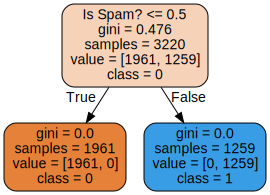

In [42]:
#!pip install pydotplus
#!pip install graphviz
#!pip install six
import pydotplus
import graphviz
import six
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import export_graphviz
from IPython.display import Image

XF = SPAMBASE_DATA
YF = SPAMBASE_DATA[['Is Spam?']]

X_trainF, X_testF, Y_trainF, Y_testF = train_test_split(XF,YF, test_size=0.3)


# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

clf.max_depth=3

# Train Decision Tree Classifer
clf = clf.fit(X_trainF,Y_trainF)

dot_data = tree.export_graphviz(clf, out_file= None, feature_names= SPAMBASE_CLEAN_COLUMNS,
                                class_names = ['0','1'], filled = True, rounded=True)
                                
graph = graphviz.Source(dot_data)  

graph


#### 3.f.ii: 
Which selection criteria is used by default when learning the tree model?

### 3.g: Naive Bayes
Use a Naive Bayes classifier to predict whether the emails are spam. Report the training and testing accuracy, sensitivity, specificity, and AUC. 
Helpful functions: Python - GaussianNB from sklearn.naive bayes. 
Python - sklearn.metrics library

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#load data in x and column of interest in y
XG = SPAMBASE_DATA
YG = SPAMBASE_DATA[['Is Spam?']]

X_trainG, X_testG, Y_trainG, Y_testG = train_test_split(XG, YG, test_size=0.3, random_state=0)

# Feature Scaling
sc = StandardScaler()

X_trainG = sc.fit_transform(X_trainG)

X_testG = sc.transform(X_testG)


# Training the Naive Bayes model on the Training set
gnb = GaussianNB()

gnb.fit(X_trainG, Y_trainG.values.ravel())


# Predicting the Test set results
y_predG = gnb.predict(X_testG)

print('Test-set accuracy score: {0:0.04f}'. format(accuracy_score(Y_testG, y_predG)))

#predicting the training set results
y_pred_trainG = gnb.predict(X_trainG)

print('Training-set accuracy score: {0:0.04f}'. format(accuracy_score(Y_trainG, y_pred_trainG)))

print(classification_report(Y_testG, y_predG))
#print(classification_report(Y_trainG, y_pred_trainG))

CM = confusion_matrix(Y_testG, y_predG)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

recall = TP / float(TP + FN)

print('Sensitivity : {0:0.4f}'.format(recall))

y_pred1 = gnb.predict_proba(X_testG)[:, 1]

ROC_AUC = roc_auc_score(Y_testG, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))


Test-set accuracy score: 1.0000
Training-set accuracy score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       822
           1       1.00      1.00      1.00       559

    accuracy                           1.00      1381
   macro avg       1.00      1.00      1.00      1381
weighted avg       1.00      1.00      1.00      1381

Sensitivity : 1.0000
ROC AUC : 1.0000


### 3H Model Selection / Evaluation
Model Selection / Evaluation: Grid Search with Cross-Validation - KFolds.
We will now incorporate cross-validation into the model selection and evaluation process and use it for the next two parts of the question, Q3(i) and Q3(j).
First, split out the test set with 20% of the data. 
Helpful functions: Python - train test split from sklearn.model _selection.

In [43]:
X_inH = SPAMBASE_DATA
Y_inH = SPAMBASE_DATA[['Is Spam?']]


X_train_H, X_test_H, y_train_H, y_test_H = train_test_split(X_inH, Y_inH, test_size=0.20, random_state=0)

flag = 0
#just debugging print outs
if(flag == 1):
    print("X_inH shape: ",X_inH.shape)
    print("Y_inH shape: ",Y_inH.shape)
    
    print("\nX_train_H shape: ", X_train_H.shape)
    print("Y_train_H shape: ", y_train_H.shape)
    
    print("\nX_test_H shape: ",X_test_H.shape)
    print("Y_test_H shape: ",y_test_H.shape)

    
    

### 3.i: Support Vector Machines
Learn SVM modesl to predict spam using 10-fold cross-validation on the train+validaiton data to select the best parameters.

#### 3.i.1: 
The remaining train+validation set, from Q3(h), will be split using 10-fold cross-validation. You will do cross-validation by hand, that is with the functions:
Helpful functions: Python - StratifiedKFold from sklearn.model selection.

In [33]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)

XH=np.asarray(X_train_H)
YH=np.asarray(y_train_H)
skf.get_n_splits(XH,YH )
#print(skf)

for train_index, test_index in skf.split(XH, YH):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_trainI1, X_testI1 = XH[train_index], XH[test_index]
    y_trainI1, y_testI1 = YH[train_index], YH[test_index]

TRAIN: [ 349  351  353 ... 3677 3678 3679] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

#### 3.i.2: 
You should train each of the models on the training set and evaluate each model on the validation set. You will examine cost parameters of [10^−2, 10^−1, 1, 10] for both the linear and RBF kernel. 
Report out in a table/dataframe for each parameter combination (cost and kernel) the following mean performances on the validation
set: accuracy, precision, and recall.

#### 3.i.3: 
Report the best parameter combination (cost and kernel) using accuracy
as the criteria.

#### 3.i.4: 
Retrain a model with the best parameters on train+validation and evaluate it on the testing data. Report this model’s accuracy, precision and recall.
Helpful Functions: Python- SVC from sklearn.svm

### 3.j: Ensemble Methods - Part 1
Learn boostin gmodesl to predict spam using 10-fold cross-validation on th etrain+validaion data to select the best parameters

#### 3.j.i: 
You will use the same method as in Q3(i)i to set up and perform the cross-validation by hand.

#### 3.j.ii:
Train AdaBoost models with the number of decision stumps to be [10, 25,
50, 100]. Report out in a table/datafram the mean F1 score for each parameter value.
Functions: Python - AdaBoostClassifier from sklearn.ensemble

#### 3.j.iii
Report out the best parameter value

#### 3.j.iv:
Retrain a model with the best parameters on train+validation and evaluate it on the testing data. Report this model’s F1 score.

### 3.k:
Model Selection and Evaluation: Grid Search with Cross-Validation-GridSearchCV

We will again perform a GridSearch with cross-validation on the train+validation set, but here we will make use of the functions that do the cross-validation internally. 

Functions: Python - GridSearchCV from sklearn.model selection. 

Here again, start by splitting out the test set with 20% of the data. 

Helpful functions: Python -train test split from sklearn.model selection.

### 3.l: Ensemble Methods - Part 2
Let's examine bagging ensamble approaches for predicting spam

#### 3.l.i:
The remaining train+validation set, from Q3(k), will be using 10-fold cross-validation with the GridSearchCV functions.
Functions: Python - GridSearchCV from sklearn.model selection

#### 3.l.ii: 
Train Random Forest models with parameters of the maximum number of
features [2, 4, 8, 16] and number of estimators of [25, 50, 100]. 
Report the mean AUC on validation set for the different parameter combinations.
Functions: Python - RandomForestClassifier from sklearn.ensemble

#### 3.l.iii:
Report out the best parameter values

#### 3.l.iv: 
Retrain a model with the best parameters on train+validation and evaluate it on the testing data. Resport this model's AUC.

## (Question 4) NBA Baskeball - Using Pipelines / Workflows
For this problem you will use a data set of 9,958 NBA basketball games (the 2016-2019 seasons).
This dataset of the games and the associated properties has been collected from NBA website
API - https://www.nba.com/. You will use this data set with the goal to predict whether
a team will win a game

The data set variables consist of the following:
- SEASON ID, GAME ID, GAME DATE - variables that are to be ignored for prediction, but here
to recognize the individual samples
- TEAM A, TEAM B, MATCHUP - variables describing the two teams in a game.
- WON - This is the target / class feature to be predicted.
The remaining variables are predictor variables for the models. They come in pairs
“* DIFF” and “* A” reporting the given statistic as the difference between Team A and
Team B and the statistic itself for Team A.
- FG PCT DIFF, FG PCT A - field goal percentage.
- FGM DIFF, FGM A - number of field goals made.
- FG3 PCT DIFF, FG3 PCT A - percentage of 3-point shots made.
- FG3M DIFF, FG3M A - number of 3-point shots made.
- FT PCT DIFF, FT PCT A - percentage of free throws made.
- FTM DIFF, FTM A - number of free throws made.
- REB DIFF, REB A - number of rebounds.
- AST DIFF, AST A - number of assists.
- STL DIFF, STL A - number of steals.
- TOV DIFF, TOV A - number of turnovers.
- PF DIFF, PF A - number of personal fouls.

For this question, you will make use of the pipeline and workflow functions to simplify the code needed to select and evaluate multiple methods.
Functions: Python - make pipeline in sklearn.pipeline

### 4.a: 
Load in the NBA data.
There are a few missing values, remove any rows that contains missing values. How many samples remain?


In [ ]:
SEASON_ID = "season_id"
GAME_ID = 'game_id'
GAME_DATE = 'game_date'

TEAM_A = 'team_a'
TEAM_B = 'team_b'
MATCHUP = 'matchup'

WON = 'won'

FIELD_GOAL_PERC_DIFF = 'field_goal_perc_diff'
FIELD_GOAL_PERC_A = 'field_goal_perc_A'

FIELD_GOAL_MADE_DIFF = 'field_goal_made_diff'
FIELD_GOAL_MADE_A = 'field_goal_made_A'

THREE_POINTERS_MADE_PERC_DIFF = 'three_pointers_made_perc_diff'
THREE_POINTERS_MADE_PERC_A = 'three_pointers_made_perc_A'

THREE_POINTERS_MADE_DIFF = 'three_pointers_made_diff'
THREE_POINTERS_MADE_A = 'three_pointers_made_A'

FREE_THROWS_MADE_PERC_DIFF = 'free_throws_made_perc_diff'
FREE_THROWS_MADE_PERC_A = 'free_throws_made_perc_A'

FREE_THROWS_MADE_DIFF = 'free_throws_made_diff'
FREE_THROWS_MADE_A = 'free_throws_made_A'

REBOUNDS_DIFF = 'rebounds_diff'
REBOUNDS_A = 'rebounds_A'

ASSISTS_DIFF = 'assists_diff'
ASSISTS_A = 'assists_A'

STEALS_DIFF = 'steals_diff'
STEALS_A = 'steals_A'

TURNOVERS_DIFF = 'turnovers_diff'
TURNOVERS_A = 'turnovers_A'

PERSONAL_FOULS_DIFF = 'personal_fouls_diff'
PERSONAL_FOULS_A = 'personal_fouls_A'

# The following two data structures were generated automatically by a python script
NBA_COLUMNS = [
	SEASON_ID,
	GAME_ID,
	GAME_DATE,
	TEAM_A,
	TEAM_B,
	MATCHUP,
	WON,
	FIELD_GOAL_PERC_DIFF,
	FIELD_GOAL_PERC_A,
	FIELD_GOAL_MADE_DIFF,
	FIELD_GOAL_MADE_A,
	THREE_POINTERS_MADE_PERC_DIFF,
	THREE_POINTERS_MADE_PERC_A,
	THREE_POINTERS_MADE_DIFF,
	THREE_POINTERS_MADE_A,
	FREE_THROWS_MADE_PERC_DIFF,
	FREE_THROWS_MADE_PERC_A,
	FREE_THROWS_MADE_DIFF,
	FREE_THROWS_MADE_A,
	REBOUNDS_DIFF,
	REBOUNDS_A,
	ASSISTS_DIFF,
	ASSISTS_A,
	STEALS_DIFF,
	STEALS_A,
	TURNOVERS_DIFF,
	TURNOVERS_A,
	PERSONAL_FOULS_DIFF,
	PERSONAL_FOULS_A,
]

NBA_CLEAN_NAMES = {
	SEASON_ID: "Season Id",
	GAME_ID: "Game Id",
	GAME_DATE: "Game Date",
	TEAM_A: "Team A",
	TEAM_B: "Team B",
	MATCHUP: "Matchup",
	WON: "Won",
	FIELD_GOAL_PERC_DIFF: "Field Goal % Difference",
	FIELD_GOAL_PERC_A: "A Team Field Goal %",
	FIELD_GOAL_MADE_DIFF: "Field Goal Difference",
	FIELD_GOAL_MADE_A: "A Team Field Goal",
	THREE_POINTERS_MADE_PERC_DIFF: "Three Pointers % Difference",
	THREE_POINTERS_MADE_PERC_A: "A Team Three Pointers %",
	THREE_POINTERS_MADE_DIFF: "Three Pointers Difference",
	THREE_POINTERS_MADE_A: "A Team Three Pointers",
	FREE_THROWS_MADE_PERC_DIFF: "Free Throws % Difference",
	FREE_THROWS_MADE_PERC_A: "A Team Free Throws %",
	FREE_THROWS_MADE_DIFF: "Free Throws Difference",
	FREE_THROWS_MADE_A: "A Team Free Throws",
	REBOUNDS_DIFF: "Rebounds Difference",
	REBOUNDS_A: "A Team Rebounds",
	ASSISTS_DIFF: "Assists Difference",
	ASSISTS_A: "A Team Assists",
	STEALS_DIFF: "Steals Difference",
	STEALS_A: "A Team Steals",
	TURNOVERS_DIFF: "Turnovers Difference",
	TURNOVERS_A: "A Team Turnovers",
	PERSONAL_FOULS_DIFF: "Personal Fouls Difference",
	PERSONAL_FOULS_A: "A Team Personal Fouls",
}

NBA_CLEAN_COLUMNS = [NBA_CLEAN_NAMES[var] for var in NBA_COLUMNS]


NBA_CSV = 'nba.csv'
NBA_DATA = pd.read_csv(NBA_CSV, names=NBA_CLEAN_COLUMNS)
# First row is just col titles, garbage in our case
NBA_DATA = NBA_DATA[1:]

# How many samples do we have?
num_samples = len(NBA_DATA.values)

# Purge samples containing null values

# Make a set of rows to delete
ROWS_MARKED_FOR_DELETION = set()

samples_removed = 0

# Find indeces that should be removed, loop through all the rows in the table
NBA_DATA.reset_index()
for i, match in NBA_DATA.iterrows():
    if any(match.isnull()):
        ROWS_MARKED_FOR_DELETION.add(i)

for ind in sorted(ROWS_MARKED_FOR_DELETION, reverse=True):
    NBA_DATA = NBA_DATA.drop(index=ind)
    samples_removed += 1

samples_remaining = len(NBA_DATA.values)

print(f"After removing {samples_removed} samples, {samples_remaining} remain.")

NBA_DATA.reset_index()
NBA_DATA.head(n=len(NBA_DATA.values))

### 4.b: 
You will not use the following columns for your predictors: SEASON ID, GAME ID, GAME DATE, TEAM A, TEAM B, MATCHUP. 
The WON column will become what you are trying to predict and the remaining columns your input variables.

In [ ]:
SIMPLE_NBA_DATA = NBA_DATA.copy()

# Remove columns we don't need
cols_to_remove = [
	NBA_CLEAN_NAMES[SEASON_ID],
	NBA_CLEAN_NAMES[GAME_ID],
	NBA_CLEAN_NAMES[GAME_DATE],
	NBA_CLEAN_NAMES[TEAM_A],
	NBA_CLEAN_NAMES[TEAM_B],
	NBA_CLEAN_NAMES[MATCHUP],
]

# Drop the columns
SIMPLE_NBA_DATA = SIMPLE_NBA_DATA.drop(columns=cols_to_remove)
SIMPLE_NBA_DATA.head(n=len(SIMPLE_NBA_DATA.values))

### 4.c: 
Split off a random 20% of the data for testing. Set the seed for the random generator to ”5”.
Python - random state and R - set.seed(5).
Helpful Python - train test split from sklearn.model selection.

In [ ]:
# Some constants that affect how our train test split functions
PERCENT_DATA_WANTED = 0.20
SEED = 5

# Split off 20% of the data
nba_train_data, nba_test_data = train_test_split(SIMPLE_NBA_DATA, test_size=PERCENT_DATA_WANTED, random_state=SEED)

nba_train_data.head(n=5)

# Extract the won column from the data, this will be used to check predictions not make them
extracted_won_train_col = nba_train_data[NBA_CLEAN_NAMES[WON]]
extracted_won_test_col = nba_test_data[NBA_CLEAN_NAMES[WON]]

extracted_won_train_col = extracted_won_train_col.astype('<U1')
extracted_won_test_col = extracted_won_test_col.astype('<U1')

print(extracted_won_test_col)

# Remove the won column from the data completely
nba_train_data = nba_train_data.drop(columns=[NBA_CLEAN_NAMES[WON]])
nba_test_data = nba_test_data.drop(columns=[NBA_CLEAN_NAMES[WON]])

### 4.d: 
Parameter Selection

You will set up the pipeline/workflow to consider using both MinMax and Standard scaling
approaches.
You will consider the following four classification methods with the hyper-parameters
specified:
- KNN with number of neighbors = [3, 7, 11, 15, 19, 23]
- DT with a maximum depth of the tree as [3, 5, 10]
- SVM with a polynomial kernel with degree = [1, 2, 3, 4] and a RBF kernel and a cost parameter of [0.01, 0.1, 1]
- RF with maximum number of features [2, 4, 8] and number of estimators of [25, 50, 100].
When selecting the best parameters with the train+validation data use 5-fold cross-validation and use F1 measure to select the best parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Since we are using the MinMax scaler and the Standard scaling, we need to scale the data set for both scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Train the scalers to fit using the training data
min_max_scaler.fit(nba_train_data)
standard_scaler.fit(nba_train_data)

# Now that the scalers are trained, actually transform the data
min_max_scaled_training_data = pd.DataFrame(min_max_scaler.transform(nba_train_data))
standard_scaled_training_data = pd.DataFrame(standard_scaler.transform(nba_train_data))
min_max_scaled_test_data = pd.DataFrame(min_max_scaler.transform(nba_test_data))
standard_scaled_test_data = pd.DataFrame(standard_scaler.transform(nba_test_data))

# First we are going to do the KNN classification method
_KNN = KNeighborsClassifier(n_neighbors=3)  # Pass in default value of 3, doesn't matter since we are just going to override everytime we call

# Now for all nearest neighbor values of k given from assignment,
K_VALUES_TO_TEST = [3, 7, 11, 15, 19, 23]
for k_value in K_VALUES_TO_TEST:

	# Update the neighbor value
	_KNN.n_neighbors = k_value

	# Train the KNN classifier using the scaled training sets to predict the win column
	_KNN.fit(min_max_scaled_training_data, extracted_won_train_col)

	# Create a prediction set
	y_pred_minmax = _KNN.predict(min_max_scaled_test_data)
	# Print the accuracy of the prediction
	minmax_accuracy = metrics.f1_score(extracted_won_test_col, y_pred_minmax, pos_label='1')

	# Now do the same thing for standard scaled data
	_KNN.fit(standard_scaled_training_data, extracted_won_train_col)
	y_pred_standard = _KNN.predict(standard_scaled_test_data)
	standard_accuracy = metrics.f1_score(extracted_won_test_col, y_pred_standard, pos_label='1')

	# Print the accuracies
	print(f"k value: {k_value} Minmax f1: {minmax_accuracy} Standard f1: {standard_accuracy}")

# Next up, decision tree
DTC_DEPTHS = [3, 5, 10]
_DTC = DecisionTreeClassifier()

# Loop through all the depths we want to try
for depth_to_test in DTC_DEPTHS:

	# Set the depth
	_DTC.max_depth = depth_to_test
	# Train the classifier using minmax
	_DTC.fit(min_max_scaled_training_data, extracted_won_train_col)
	# Create a prediction set
	y_pred_minmax = _DTC.predict(min_max_scaled_test_data)
	# What was the accuracy?
	minmax_accuracy = metrics.f1_score(extracted_won_test_col, y_pred_minmax, pos_label='1')

	# Same thing for standard
	# Train the classifier using standard
	_DTC.fit(standard_scaled_training_data, extracted_won_train_col)
	# Create a prediction set
	y_pred_standard = _DTC.predict(standard_scaled_test_data)
	# What was the accuracy?
	standard_accuracy = metrics.f1_score(extracted_won_test_col, y_pred_standard, pos_label='1')

	# Print results
	print(f"max depth: {depth_to_test} Minmax f1: {minmax_accuracy} Standard f1: {standard_accuracy}")

# Next SVM
POLYNOMIAL_DEGREES = [1, 2, 3, 4]
COSTS = [.01, .1, 1]
_SVM = SVC()

# First try polynomial kernels
for poly in POLYNOMIAL_DEGREES:
	# Set the kernel and the polyomial degree
	_SVM.kernel = 'poly'
	_SVM.degree = poly
	# Train the classifier using minmax
	_SVM.fit(min_max_scaled_training_data, extracted_won_train_col)
	# Create a prediction set
	y_pred_minmax = _SVM.predict(min_max_scaled_test_data)
	# What was the accuracy?
	minmax_accuracy = metrics.f1_score(extracted_won_test_col, y_pred_minmax, pos_label='1')

	# Same thing for standard
	# Train the classifier using standard
	_SVM.fit(standard_scaled_training_data, extracted_won_train_col)
	# Create a prediction set
	y_pred_standard = _SVM.predict(standard_scaled_test_data)
	# What was the accuracy?
	standard_accuracy = metrics.f1_score(extracted_won_test_col, y_pred_standard, pos_label='1')

	# Print results
	print(f"polynomial degree: {poly} Minmax f1: {minmax_accuracy} Standard f1: {standard_accuracy}")

# Now the rbf kernels
for cost in COSTS:
	# Set the kernel and the cost
	_SVM.kernel = 'rbf'
	_SVM.gamma = cost
	# Train the classifier using minmax
	_SVM.fit(min_max_scaled_training_data, extracted_won_train_col)
	# Create a prediction set
	y_pred_minmax = _SVM.predict(min_max_scaled_test_data)
	# What was the accuracy?
	minmax_accuracy = metrics.f1_score(extracted_won_test_col, y_pred_minmax, pos_label='1')

	# Same thing for standard
	# Train the classifier using standard
	_SVM.fit(standard_scaled_training_data, extracted_won_train_col)
	# Create a prediction set
	y_pred_standard = _SVM.predict(standard_scaled_test_data)
	# What was the accuracy?
	standard_accuracy = metrics.f1_score(extracted_won_test_col, y_pred_standard, pos_label='1')

	# Print results
	print(f"cost: {cost} Minmax f1: {minmax_accuracy} Standard f1: {standard_accuracy}")

# Now the RF
FEATURES = [2, 4, 8]
ESTIMATORS = [25, 50, 100]
_RFC = RandomForestClassifier()

for feature, estimator in zip(FEATURES, ESTIMATORS):
	# Set the features and estimators
	_RFC.max_features = feature
	_RFC.n_estimators = estimator
	# Train the classifier using minmax
	_RFC.fit(min_max_scaled_training_data, extracted_won_train_col)
	# Create a prediction set
	y_pred_minmax = _RFC.predict(min_max_scaled_test_data)
	# What was the accuracy?
	minmax_accuracy = metrics.f1_score(extracted_won_test_col, y_pred_minmax, pos_label='1')

	# Same thing for standard
	# Train the classifier using standard
	_RFC.fit(standard_scaled_training_data, extracted_won_train_col)
	# Create a prediction set
	y_pred_standard = _RFC.predict(standard_scaled_test_data)
	# What was the accuracy?
	standard_accuracy = metrics.f1_score(extracted_won_test_col, y_pred_standard, pos_label='1')

	# Print results
	print(f"features/estimators: {feature}/{estimator} Minmax f1: {minmax_accuracy} Standard f1: {standard_accuracy}")

### 4.e: 
Report Results

Once the best parameters for each model are found, retrain a model with those parameters and evaluate the performance on the test set.
Report in a table the following information for each model: the model type (KNN, DT, SVM, RF), the best parameters selected, 
Accuracy, Precision, Recall, F1, AUC on the test set.